# Document classification
Text documents are one of the richest sources of data for businesses: whether in the shape of customer support tickets, emails, technical documents, user reviews or news articles, they all contain valuable information that can be used to automate slow manual processes, better understand users, or find valuable insights.

first of all i have read the trainset.txt and read it line by line.all the lines are saved in a array list called lines.


In [1]:
text_file = open("trainset.txt", "r")
lines = text_file.readlines()
#print(lines[1])
text_file.close()
#read line by line

In [2]:
listOfAttributes = [] # implicit instantiation
listOfAttributes.append([])
i = 0
while i < len(lines):
    attributes = lines[i].split('\t') #split it by tab
    listOfAttributes.append([])
    listOfAttributes[i].append(attributes[0])
    listOfAttributes[i].append(attributes[1])
    listOfAttributes[i].append(attributes[2])
    listOfAttributes[i].append(attributes[3])
    i+=1
        
#print(listOfAttributes[0])
# print(len(listOfAttributes) )

### Prepossesing
 For achieving better results from the applied model in Machine Learning, the format of the data has to be in a proper manner. Some specified Machine Learning model needs information in a specified format, for example, Random Forest algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set.
 
Another aspect is that data set should be formatted in such a way that more than one Machine Learning and Deep Learning algorithms are executed in one data set, and best out of them is chosen.That is why text prepossesing used.
In this project we use Regex for do that task easily.

1).Remove all the special characters except space

2).Substituting multiple spaces with single space

3).stemming handle

4).stopword handle

after that these data are good for go.

I could use either predictions separately or combine the all the columns except class column. As research suggest that the accuracy will be higher when we have all in one cloumn.Therefore i have to combine the title ,date and body together and create a new string and them them in 2D array with size  (len(lines) * 2).

In [3]:
#Doing prepossesing
import re #regex
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess(eliment):
      
    eliment = re.sub(r'([^\s\w]|_)+', '', eliment) # Remove all the special characters except space
    eliment = eliment.lower()
    eliment = re.sub(r'\s+', ' ', eliment, flags=re.I)# Substituting multiple spaces with single space

    all_words = eliment.split()
    en_stops = set(stopwords.words('english')) #stopword handle
    eliment = ""
    ps = PorterStemmer() #stemming handle  

    for word in all_words: 
        if word not in en_stops:   
            eliment +=  ps.stem(word) +" "

    return eliment 

listOfAttributesProcessed = [] # implicit instantiation
listOfAttributesProcessed.append([])
i = 0
while i <len(lines):
    listOfAttributesProcessed.append([])
    listOfAttributesProcessed[i].append(listOfAttributes[i][0])
    
    processedEliment1= preprocess(listOfAttributes[i][1] )
    processedEliment2= preprocess(listOfAttributes[i][2] )
    processedEliment3= preprocess(listOfAttributes[i][3] )
    
    AllEliments = processedEliment1+processedEliment2+processedEliment3 #combine attributes
    
    listOfAttributesProcessed[i].append(AllEliments)

#    print(listOfAttributesProcessed[i])  
    i+=1

In [4]:
import csv
with open("featuresTrain.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(listOfAttributesProcessed)

In [22]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore") #remove warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

df=pd.read_csv('featuresTrain.csv',sep=',',names=['class','text'])
df.head();

### Traning and testing data extraction
We can grab whole " text data " and " class data " and we can split the data.In here we use  2/3 for trainning the algorithem and others for testing.

In [6]:
df_x=df["text"]
df_y=df["class"]
cv = TfidfVectorizer(min_df=1)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.333, random_state=0)


######  
The script above uses TfidfVectorizer class from the sklearn.feature_extraction.text library. There are some important parameters that are required to be passed to the constructor of the class. The first parameter is the max_features parameter, which is set to 1500. This is because when you convert words to numbers using the bag of words approach, all the unique words in all the documents are converted into features. All the instances can contain tens of thousands of unique words. But the words that have a very low frequency of occurrence are unusually not a good parameter for classifying instance. Therefore we set the max_features parameter to 1500, which means that we want to use 1500 most occurring words as features for training our classifier.

The next parameter is min_df and it has been set to 5. This corresponds to the minimum number of documents that should contain this feature. So we only include those words that occur in at least 5 documents. Similarly, for the max_df, feature the value is set to 0.7; in which the fraction corresponds to a percentage. Here 0.7 means that we should include only those words that occur in a maximum of 70% of all the instances. Words that occur in almost every instance are usually not suitable for classification because they do not provide any unique information about the paragraph.


In [7]:
cv = TfidfVectorizer(max_features=1500, min_df=1, max_df=0.7) #minimum number of documents that should contain this feature
x_traincv=cv.fit_transform(x_train)
a=x_traincv.toarray()

### Predictions
I have used the multinomial Naive Bayes classifier as prediction algorithem.The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification etc). The multinomial distribution normally requires integer feature counts.

In [32]:
mnb = MultinomialNB()
mnb.fit(x_traincv,y_train);
x_testcv=cv.transform(x_test);
x_testcv.toarray();
predictions=mnb.predict(x_testcv)
#print(predictions);

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_traincv,y_train)
predictions1 = knn.predict(x_testcv)
                           


### Accuracies
I have used the multinomial Naive Bayes classifier as prediction algorithem.The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification etc). The multinomial distribution normally requires integer feature counts.But as we can see in the accuracy and the confucion matrix KNeighbors Classifier give the better results.

In [29]:
actual=np.array(y_test)
print('Training Accuracy: ',mnb.score(x_traincv,y_train))

Training Accuracy:  1.0


In [36]:
# calculate accuracy of class predictions
from sklearn import metrics
acc = metrics.accuracy_score(actual, predictions)
print('Testing Accuracy of multinomial naive bayes Classifie: ',acc)

acc1 = metrics.accuracy_score(actual, predictions1)
print('Testing Accuracy KNeighbors Classifier : ',acc1)

Testing Accuracy of multinomial naive bayes Classifie:  0.9552238805970149
Testing Accuracy KNeighbors Classifier :  0.9850746268656716


### Confution matrix

In [11]:
print(metrics.confusion_matrix(actual, predictions)) #confusion matrix of naive bayes Classifie

[[23  0]
 [ 3 41]]


In [38]:
print(metrics.confusion_matrix(actual, predictions1)) #confusion matrix of  KNeighbors Classifier

[[23  0]
 [ 1 43]]


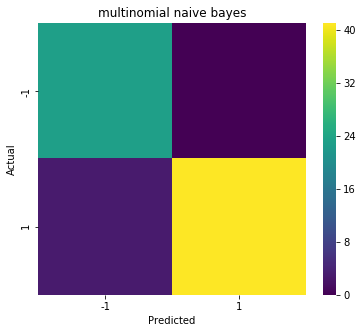

In [39]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
conf_matrix =metrics.confusion_matrix(actual, predictions)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(conf_matrix, fmt="g", cmap='viridis',xticklabels=[-1,1], yticklabels=[-1,1])
plt.title('multinomial naive bayes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

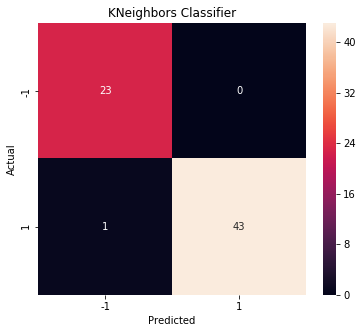

In [40]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
conf_matrix =metrics.confusion_matrix(actual, predictions1)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=[-1,1], yticklabels=[-1,1])
plt.title('KNeighbors Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Confusion matrix 
[TN FP
 FN TP]

### Classification report

In [21]:
target_names =["+1", "-1"]
print(classification_report(actual, predictions, target_names=target_names))

             precision    recall  f1-score   support

         +1       0.88      1.00      0.94        23
         -1       1.00      0.93      0.96        44

avg / total       0.96      0.96      0.96        67



In [41]:
target_names =["+1", "-1"]
print(classification_report(actual, predictions1, target_names=target_names))


             precision    recall  f1-score   support

         +1       0.96      1.00      0.98        23
         -1       1.00      0.98      0.99        44

avg / total       0.99      0.99      0.99        67



### Testsetwithoutlabels.txt prediction

In [43]:

text_file = open("testsetwithoutlabels.txt", "r")
l = text_file.readlines()
test=cv.transform(l)
test.toarray()
predict=mnb.predict(test)
#print('%d %s' % predict[0],l[0])
i=0
while i < len(l):
    #print ("{0} {1}".format(predict[i], l[i]) )
    i+=1

